# Part II - Prosper Loan Data Exploration

## by NGUYEN Duc Huy

>**Before you start**: You must have the README.md file ready that include a summary of main findings that reflects on the steps taken during the data exploration (Part I notebook). The README.md file should also describes the key insights that will be conveyed by the explanatory slide deck (Part II  outcome)



## Investigation Overview


> Describe the overall goals of your presentation here. Add a summary of key insights at the start of the notebook, just as you added in the README.md. This will help your notebook to stay aligned to the key insights you want to include in your slide deck.

> **Rubric Tip**: The key insights in the slideshow must match those documented in the README.md summary. 


## Dataset Overview

his dataset is financial dataset and this is related to the loan, borrowers, lenders, interest rates... Prosper or Prosper Marketplace Inc. is a San Francisco, California based company specializing in loans at low interest rates to the borrowers. 
The dataset is comprised of 81 variables and contains 113937 entries.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
data = pd.read_csv('prosperLoanData.csv')

# Define features of interest for this analysis
features = ["Term","EstimatedEffectiveYield", "EstimatedLoss","EstimatedReturn", "BorrowerAPR", "BorrowerRate", "LenderYield",
            "EmploymentStatusDuration", "DebtToIncomeRatio", "LoanStatus", "IsBorrowerHomeowner", "ProsperScore",
            "MonthlyLoanPayment", "StatedMonthlyIncome", "Occupation"]

# New subdataset
df = data[features]

df = df.drop_duplicates()

# Filling missing values 
df['Occupation']=df['Occupation'].fillna('Unknown')

# ProsperScore is the most important feature of this dataset
df = df[df['ProsperScore'].notnull()].reset_index()

# Filling missing values with mean
df['DebtToIncomeRatio'] = df['DebtToIncomeRatio'].fillna(df['DebtToIncomeRatio'].mean())
df['EmploymentStatusDuration'] = df['EmploymentStatusDuration'].fillna(df['EmploymentStatusDuration'].mean())

In [3]:
def fun(num):
  
    if num == "Completed":
        return "Completed"
    
    elif num =="Defaulted":
        return "Defaulted"
  
    else:
        return "Other"

df["LoanStatus_"] = df["LoanStatus"].apply(fun)

df_plot = df.groupby(['Term'])["LoanStatus_"].value_counts(normalize=True).rename('percentage').mul(100)
# 
df_plot = df_plot.reset_index().pivot(columns='LoanStatus_', index='Term', values= 'percentage')

## Visualization 1: "LoanStatus: Completed vs Defaulted"

We can see that there is a trend in the of LoanStatus of Completed and Defaulted

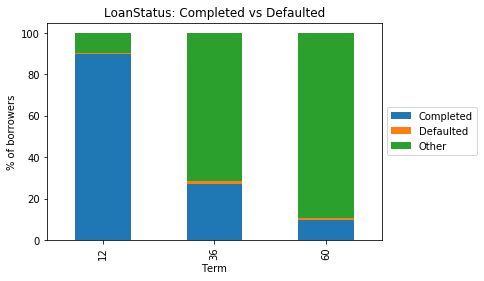

In [4]:
plt.figure(figsize=(20, 10))
# df_plot.plot(kind='bar', stacked=True)
df_plot.plot.bar(stacked=True)
plt.legend (loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("LoanStatus: Completed vs Defaulted")
plt.ylabel('% of borrowers')
plt.show()

## Visualization 2: Loan for experienced people

We can see that the more experience people gain on the job, the less likely they are to choose to borrow.

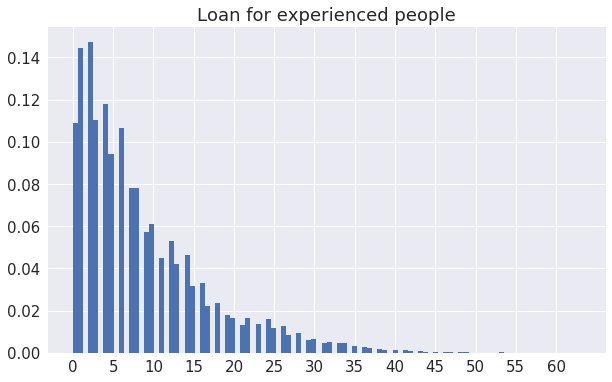

In [5]:
df["EmploymentStatusDuration_y"] = df["EmploymentStatusDuration"]/12
df["EmploymentStatusDuration_y"] = df["EmploymentStatusDuration_y"].round()

sns.set(font_scale= 1.5)
plt.figure(figsize=(10,6))
df["EmploymentStatusDuration_y"].hist(bins =100, density = 1,)
plt.title("Loan for experienced people")
plt.xticks(np.arange(min(df["EmploymentStatusDuration_y"]), max(df["EmploymentStatusDuration_y"])+1, 5.0))
plt.show()

## Visualization 3: Interest Rate distribution

We can see that borrowers with poor prospects are subject to higher interest rates than borrowers with better prospects.



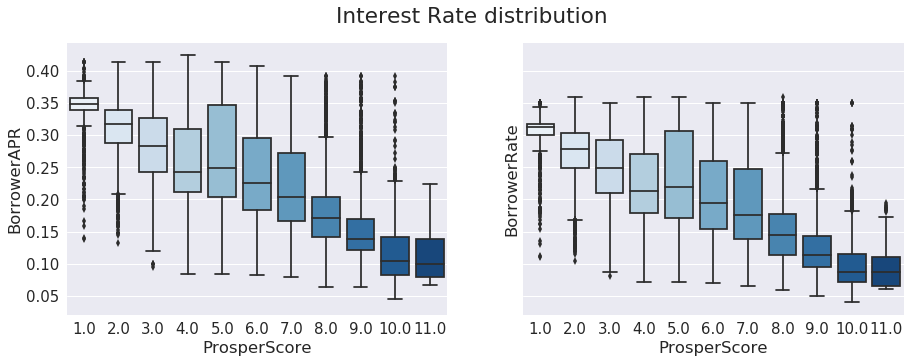

In [6]:
# plt.figure(figsize=(10,6))
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Interest Rate distribution')

sns.boxplot(data=df,  x ="ProsperScore", y="BorrowerAPR", ax=axes[0], palette="Blues")

sns.boxplot(data=df,  x ="ProsperScore", y="BorrowerRate", ax=axes[1], palette="Blues")
flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                  linestyle='none', markeredgecolor='g')
plt.show()

## Visualization 4: Heatmap Correlation values

the BorrowerRate" and "LenderYield" are highly and positively correlated with one another. The other strong relationship is between BorrowerRate and Borrower APR. Moreover, there is a moderate and negative correlation between MonthlyLoanPayment and BorrowerRate/LenderYield. Most of the remaining variables doesn't present a strong correlation.

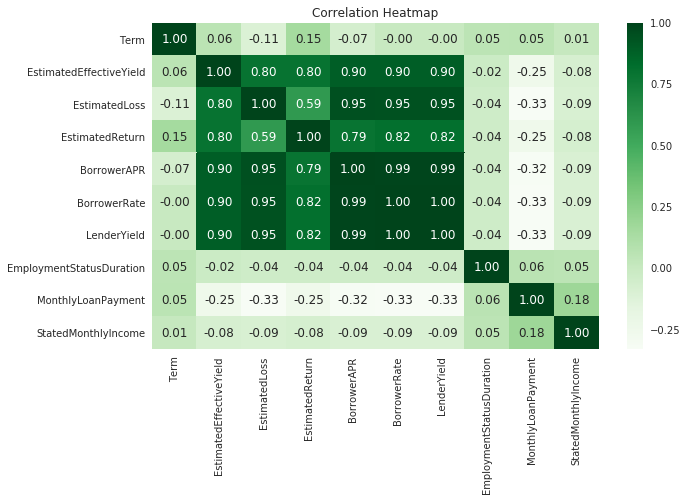

In [7]:
# plotting correlation heatmap
plt.style.use('seaborn-talk')
sns.set(font_scale= 1.0)
plt.figure(figsize=(10,6))
plt.title("Correlation Heatmap")
sub_df = df[["Term", "EstimatedEffectiveYield", "EstimatedLoss", "EstimatedReturn", "BorrowerAPR", "BorrowerRate", 
             "LenderYield","EmploymentStatusDuration", "MonthlyLoanPayment", "StatedMonthlyIncome"]]
dataplot = sns.heatmap(sub_df.corr(), cmap="Greens", square=False,  annot=True, fmt='.2f' )
  
# displaying heatmap
plt.show()

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 471807 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.


In [ ]:
# Converting this report to html format
# from subprocess import call
# call(['python', '-m', 'nbconvert', 'Part_II_slide_deck_template.ipynb'])